Harris Corner Detection using OpenCV

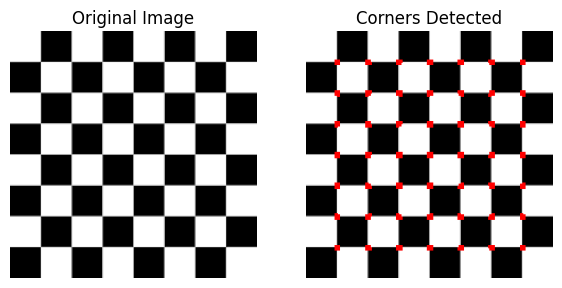

In [41]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'Images/chessboard.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners (optional)
dst = cv.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert BGR to RGB for correct color representation in Matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Plot using subplots
plt.figure(figsize=(7,7))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB))  # Show original image
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_rgb)  # Show processed image with detected corners
plt.title("Corners Detected")
plt.axis("off")

plt.show()

Harris Corner Detection Evaluation

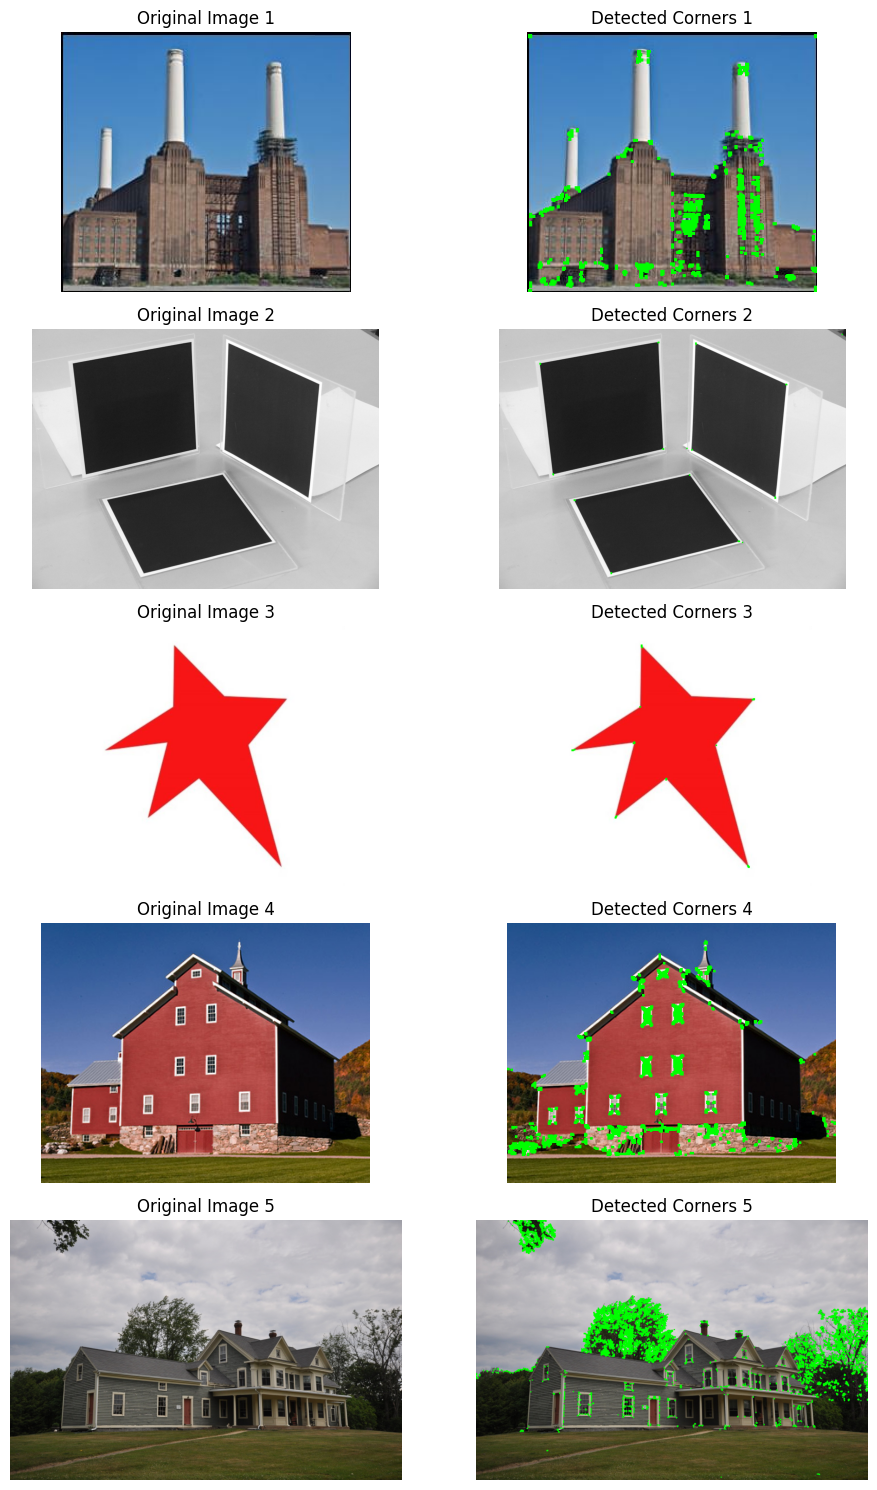

In [42]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# List of image filenames
filenames = [
    'Images/image1.jpg',
    'Images/Image2.jpg',
    'Images/Image3.jpg',
    'Images/Image4.jpg',
    'Images/Image5.jpg'
]

# Create a figure with subplots
plt.figure(figsize=(10, 15))

for i, filename in enumerate(filenames):
    img = cv.imread(filename)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Convert to float and apply Harris Corner Detection
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, 2, 3, 0.04)

    # Dilate result for marking the corners
    dst = cv.dilate(dst, None)

    # Mark detected corners in green
    img[dst > 0.01 * dst.max()] = [0, 255, 0]

    # Convert images to RGB for Matplotlib display
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    original_rgb = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2RGB)

    # Plot original image
    plt.subplot(len(filenames), 2, 2 * i + 1)
    plt.imshow(original_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis("off")

    # Plot processed image with detected corners
    plt.subplot(len(filenames), 2, 2 * i + 2)
    plt.imshow(img_rgb)
    plt.title(f"Detected Corners {i+1}")
    plt.axis("off")

# Show all images
plt.tight_layout()
plt.show()

Improved Version of Harris Corner Detection

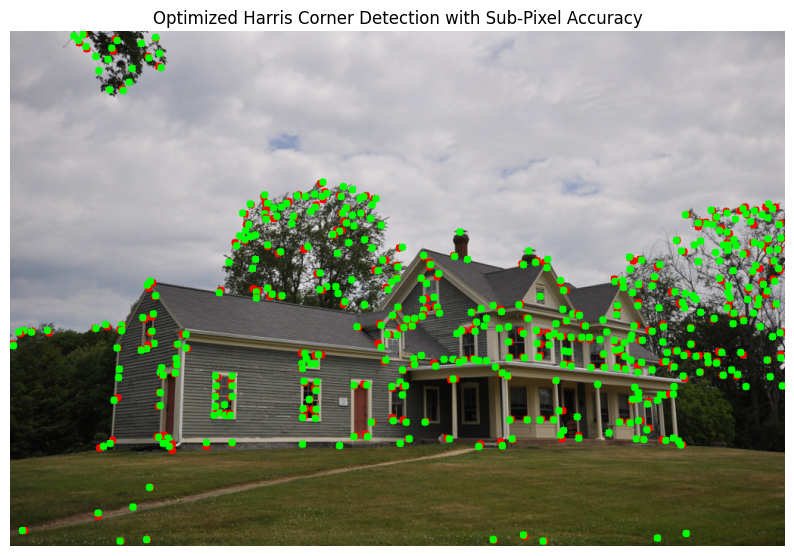

In [44]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

# Load image
filename = 'Images/Image5.jpg'
img = cv.imread(filename)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Unable to load image '{filename}'")
else:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # 🔹 Step 1: Improved Preprocessing
    gray = cv.GaussianBlur(gray, (5, 5), 0)  # Reduce noise
    gray = cv.equalizeHist(gray)  # Enhance contrast

    # 🔹 Step 2: Harris Corner Detection with Adjusted Parameters
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray, blockSize=3, ksize=5, k=0.06)

    # Thresholding & Non-Maximum Suppression
    dst[dst < 0.01 * dst.max()] = 0
    dst = cv.dilate(dst, None)
    _, dst = cv.threshold(dst, 0.01 * dst.max(), 255, cv.THRESH_BINARY)
    dst = np.uint8(dst)

    # 🔹 Step 3: Find Centroids of Detected Corners
    _, _, _, centroids = cv.connectedComponentsWithStats(dst)

    # 🔹 Step 4: Apply Sub-Pixel Accuracy Refinement
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.01)
    refined_corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)

    # 🔹 Step 5: Draw Centroids and Refined Corners
    for centroid, refined in zip(centroids[1:], refined_corners[1:]):  # Skip background centroid
        cv.circle(img, tuple(np.int32(centroid)), 5, (0, 0, 255), -1)  # 🔴 Red for initial detection
        cv.circle(img, tuple(np.int32(refined)), 5, (0, 255, 0), -1)  # 🟢 Green for refined detection

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Optimized Harris Corner Detection with Sub-Pixel Accuracy')
    plt.axis('off')  # Hide the axes
    plt.show()
